### 确定数据分析的目标
#### 对电商行业指标进行测算
#### RFM模型建立（对用户分层）


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1.导入数据
2.观测数据
3.清洗数据
4.指标计算
5.数据可视化
6.模型建立

#### 1.导入数据

In [2]:
df = pd.read_excel('./某电商网站订单数据.xlsx',index_col='id')

In [3]:
df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否


#### 2.观测基本信息

空值
名字错误

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.8+ MB


修改列名

In [5]:
df.rename(columns={'chanelID':'channelID','platfromType':'platformType'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   channelID     104549 non-null  object        
 6   platformType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.8+ MB


确定分析时间窗口

选取2019年数据

In [7]:
from datetime import datetime

In [8]:
start = datetime(2019,1,1)
end = datetime(2019,12,31,23,59,59)

In [9]:
df.drop(df[df['orderTime']<start].index,inplace=True)

In [10]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2020-268392025,user-182189,PR000082,186.37,126.21,渠道-0568,Wech atMP,2020-01-01 23:30:57,2020-01-01 23:31:09,否
104554,sys-2020-213140521,user-170057,PR000603,138.81,138.81,渠道-0007,APP,2020-01-01 23:31:26,2020-01-01 23:31:36,否
104555,sys-2020-274536228,user-156592,PR000405,2632.27,2632.27,渠道-0985,Wech atMP,2020-01-01 23:46:56,2020-01-01 23:47:06,否


In [11]:
df.drop(df[df['orderTime']>end].index,inplace=True)

清洗

时间异常值  -->  不符合业务逻辑

In [12]:
df.drop(df[df.payTime<df.orderTime].index,inplace=True)

In [13]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


删除订单支付时间>半小时的 订单数据

In [14]:
delta = df.payTime-df.orderTime

In [15]:
df.drop(df[delta.dt.days>0].index,inplace=True)

In [16]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


In [17]:
df.drop(index=df[delta.dt.seconds>1800].index,inplace=True)

E:\Users\panyue\AppData\Local\Temp\ipykernel_23700\3991069202.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(index=df[delta.dt.seconds>1800].index,inplace=True)


In [18]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


订单金额&支付金额<0？

In [19]:
df[df.payment<0]

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
999,sys-2019-324068352,user-112962,PR000602,364.08,-12.47,渠道-0465,Wech atMP,2019-01-04 10:47:05,2019-01-04 10:47:05,否
18684,sys-2019-311194385,user-110299,PR000797,118.06,-10.08,渠道-0896,WEB,2019-04-06 11:20:43,2019-04-06 11:21:31,否
31393,sys-2019-296608442,user-212991,PR000385,112.91,-10.17,渠道-0396,APP,2019-05-24 08:52:04,2019-05-24 08:52:23,否
66573,sys-2019-288096069,user-186966,PR000511,136.99,-12.34,渠道-0318,APP,2019-09-08 21:32:54,2019-09-08 21:33:10,否
72266,sys-2019-316685479,user-189901,PR000554,2287.74,-10.98,渠道-0765,Wech atMP,2019-09-28 11:57:46,2019-09-28 11:57:46,否
96939,sys-2019-323229098,user-198083,PR000548,126.92,-11.13,渠道-0318,APP,2019-12-10 14:24:13,2019-12-10 14:24:26,是


In [20]:
df.drop(df[df.payment<0].index,inplace=True)

In [21]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否


折扣异常


In [22]:
df['discount'] = df.payment/df.orderAmount

In [23]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982


In [24]:
df[df.discount>1]

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
16,sys-2019-322802617,user-125220,PR000812,430.69,4223.476684,渠道-0530,Wech atMP,2019-01-01 07:59:45,2019-01-01 07:59:59,否,9.806303
46,sys-2019-321496315,user-283798,PR000520,1052.36,9449.242956,渠道-0896,APP,2019-01-01 11:23:03,2019-01-01 11:23:17,否,8.979097
66,sys-2019-355823490,user-258709,PR000927,358.94,3580.284755,渠道-9527,AP P,2019-01-01 12:31:55,2019-01-01 12:32:23,否,9.974605
69,sys-2019-277578024,user-223627,PR000830,2331.25,22486.795449,渠道-0530,AP P,2019-01-01 12:37:41,2019-01-01 12:38:20,否,9.645810
148,sys-2019-355060894,user-214122,PR000826,205.78,2044.275720,渠道-0007,APP,2019-01-01 14:44:49,2019-01-01 14:45:21,是,9.934278
...,...,...,...,...,...,...,...,...,...,...,...
104163,sys-2019-378227947,user-241360,PR000581,463.15,4629.168060,渠道-9527,APP,2019-12-31 14:32:32,2019-12-31 14:32:46,否,9.994965
104166,sys-2019-283219085,user-153512,PR000363,1651.02,16282.360600,渠道-0465,APP,2019-12-31 14:45:13,2019-12-31 14:45:36,否,9.862001
104208,sys-2019-318820358,user-170535,PR000739,287.35,2410.784113,渠道-0896,APP,2019-12-31 17:54:15,2019-12-31 17:54:32,是,8.389713


数据太多不可能删 --> 找个折扣

In [25]:
# 平均折扣
mean_discount = df[df.discount<=1].discount.mean()

In [26]:
mean_discount

0.9179310544305944

In [27]:
# 如果支付价格被超级加倍了 就改成平均折扣后的价格
df.discount = df.discount.apply(lambda x:mean_discount if x>1 else x)

In [28]:
df.payment = df.orderAmount * df.discount

空值  渠道ID  --> 众数

In [29]:
df.fillna(df.channelID.mode()[0],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103348 entries, 6 to 104301
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103348 non-null  object        
 1   userID        103348 non-null  object        
 2   goodsID       103348 non-null  object        
 3   orderAmount   103348 non-null  float64       
 4   payment       103348 non-null  float64       
 5   channelID     103348 non-null  object        
 6   platformType  103348 non-null  object        
 7   orderTime     103348 non-null  datetime64[ns]
 8   payTime       103348 non-null  datetime64[ns]
 9   chargeback    103348 non-null  object        
 10  discount      103348 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.5+ MB


平台类型 --> 格式不统一 字符串中的空格 / 大小写不统一

In [31]:
df.platformType = df.platformType.str.replace(r'\s',"",regex=True).str.lower()

In [32]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982


#### 3.测算指标

##### GMV 交易总金额
##### 总销售额
##### 实际销售额

###### 2019年整年指标

In [33]:
gmv_2019 = df.orderAmount.sum()

In [34]:
print('2019 gmv:',gmv_2019)

2019 gmv: 108527205.98999998


In [35]:
sales_2019 = df.payment.sum()

In [36]:
print('2019 sales:',sales_2019)

2019 sales: 102630360.28680262


In [37]:
real_sales_2019 = df[df.chargeback=='否'].payment.sum()

In [38]:
print('2019 real sales:',real_sales_2019)

2019 real sales: 88940437.70922612


###### 月度指标

In [39]:
df['month'] = df.orderTime.dt.month

In [40]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month
id,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000,1
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507,1
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975,1
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811,1
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544,12
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696,12
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982,12


分组计算

In [41]:
gmv_m = df.groupby(by='month').orderAmount.sum()/10000
sales_m = df.groupby(by='month').payment.sum()/10000
real_sales_m = df[df.chargeback=='否'].groupby(by='month').payment.sum()/10000

In [42]:
gmv_m

month
1      694.773844
2      552.894016
3      681.160025
4      731.591698
5     1001.280720
6     1055.418161
7     1026.678831
8     1055.370552
9      970.867558
10     938.113781
11    1080.981479
12    1063.589934
Name: orderAmount, dtype: float64

In [43]:
sales_m

month
1      666.186805
2      533.045992
3      655.442354
4      700.992838
5      939.886135
6      998.310141
7      962.204257
8      989.530819
9      905.006052
10     879.350827
11    1020.676368
12    1012.403441
Name: payment, dtype: float64

In [44]:
real_sales_m

month
1     576.152901
2     458.580518
3     567.679810
4     605.273301
5     817.951115
6     870.140819
7     829.981552
8     854.722130
9     791.459101
10    761.410154
11    889.015023
12    871.677346
Name: payment, dtype: float64

##### 画图

In [45]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

创建画布

In [46]:
plt.figure(figsize=(8,4),dpi=120)

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

创建坐标系

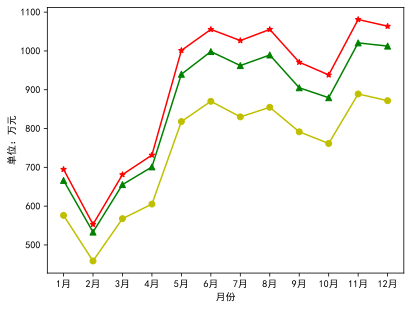

In [47]:
ax = plt.subplot(1,1,1)
plt.plot(gmv_m.index,gmv_m,'r',label='GMV',marker='*')
plt.plot(sales_m.index,sales_m,'g',label='sales',marker='^')
plt.plot(real_sales_m.index,real_sales_m,'y',label='real sales',marker='o')
plt.xticks(gmv_m.index,labels=[f'{x}月' for x in gmv_m.index])
plt.xlabel("月份")
plt.ylabel("单位：万元")
plt.show()

pycharts

In [65]:
import pyecharts.options as opts
from pyecharts.charts import Line

c = (
    Line()
        .set_global_opts(
        title_opts=opts.TitleOpts(title='月度指标'),
        yaxis_opts=opts.AxisOpts(name='单位：万元'),
        xaxis_opts=opts.AxisOpts(name='月份')
    )
    .add_xaxis([f'{x}月' for x in gmv_m.index])
    .add_yaxis("GMV", np.round(gmv_m.values.tolist(),1))
    .add_yaxis("sales",  np.round(sales_m.values.tolist(),1))
    .add_yaxis("real sales",  np.round(real_sales_m.values.tolist(),1))
    .set_global_opts(title_opts=opts.TitleOpts(title="月度指标"))
#    .render("月度指标.html")
    .render_notebook()
)

In [79]:
c

#### 各渠道GMV

In [50]:
channels_ser = df.groupby('channelID').orderAmount.sum()

In [51]:
gmv_ser = channels_ser.nlargest(10)

<Axes: ylabel='orderAmount'>

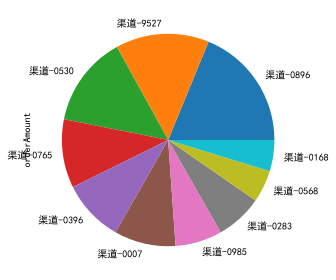

In [52]:
gmv_ser.plot(kind='pie')

#### 周一至周日下单量

In [53]:
df['week']=df.orderTime.dt.dayofweek

In [54]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,week
id,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000,1,1
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507,1,1
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975,1,1
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811,1,1
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544,12,1
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696,12,1
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982,12,1


In [55]:
week_count= df.groupby(by='week').orderID

In [56]:
week_order_count = week_count.count()

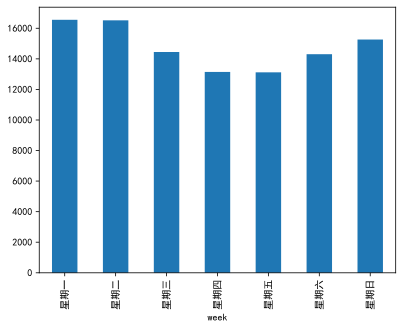

In [64]:
week_order_count.plot(kind='bar')

plt.xticks(week_order_count.index,labels = [f'星期{x}' for x in '一二三四五六日'])
plt.show()

#### 用户复购率

In [69]:
temp = pd.pivot_table(df,
                      values='orderID',index='userID',columns='month',aggfunc='nunique')

In [70]:
temp

month,1,2,3,4,5,6,7,8,9,10,11,12
userID,,,,,,,,,,,,
user-100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-100003,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
user-100007,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
user-299980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
user-299983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
user-299989,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [71]:
def handle (x):
    if x > 1:
        return 1
    elif x==1:
        return 0
    else:
        return np.NAN

In [ ]:
temp = temp.applymap(handle)

In [62]:
ser = temp.sum()/temp.count()

In [63]:
for i in ser:
    print(i)

0.01826630347700689
0.011412268188302425
0.017425810904071772
0.020200462606013877
0.030539241857981847
0.030531400966183574
0.02522445489525438
0.03163805204621531
0.024718363775566007
0.027911784975878703
0.02911167275109988
0.03084932035091102


#### 4.RFM模型建立

##### R --> 最近一次购买距今有多远

建立购买频率列 F代表一次购买行为

In [64]:
df['F']=1

In [65]:
df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,week,F
id,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否,1.000000,1,1,1
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否,0.967507,1,1,1
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否,0.961975,1,1,1
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否,0.952811,1,1,1
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否,1.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2019-344079195,user-182248,PR000813,831.29,766.07,渠道-0896,wechatmp,2019-12-31 23:32:55,2019-12-31 23:33:06,否,0.921544,12,1,1
104298,sys-2019-296195955,user-143322,PR000938,1565.67,1414.89,渠道-0007,app,2019-12-31 23:33:05,2019-12-31 23:34:36,是,0.903696,12,1,1
104299,sys-2019-382387725,user-220484,PR000782,3326.83,3273.54,渠道-0530,web,2019-12-31 23:37:30,2019-12-31 23:37:44,否,0.983982,12,1,1


In [67]:
temp = pd.pivot_table(df,
                     values=['orderTime','payment','F'],
                      index='userID',
                      aggfunc={
                          'orderTime':np.max,
                          'payment':np.sum,
                          'F':np.sum
                      })

In [68]:
temp

,F,orderTime,payment
userID,,,
user-100000,1,2019-10-13 18:46:46,1770.81
user-100003,1,2019-05-24 13:04:05,511.59
user-100006,2,2019-11-14 15:37:19,2771.98
user-100007,1,2019-01-14 18:45:35,2162.14
user-100008,1,2019-11-16 17:15:03,4879.94
...,...,...,...
user-299980,1,2019-10-18 10:53:37,389.44
user-299983,1,2019-12-27 17:57:11,706.80
user-299989,2,2019-11-11 10:40:08,1637.47


In [69]:
temp["R"] = (temp.orderTime-datetime(2019,12,31)).dt.days
temp["M"] = temp.payment
temp = temp[['R','F','M']]

In [70]:
temp

,R,F,M
userID,,,
user-100000,-79,1,1770.81
user-100003,-221,1,511.59
user-100006,-47,2,2771.98
user-100007,-351,1,2162.14
user-100008,-45,1,4879.94
...,...,...,...
user-299980,-74,1,389.44
user-299983,-4,1,706.80
user-299989,-50,2,1637.47


In [71]:
temp = temp.apply(lambda x: x-x.mean())

In [72]:
temp

,R,F,M
userID,,,
user-100000,67.941298,-0.314007,465.926905
user-100003,-74.058702,-0.314007,-793.293095
user-100006,99.941298,0.685993,1467.096905
user-100007,-204.058702,-0.314007,857.256905
user-100008,101.941298,-0.314007,3575.056905
...,...,...,...
user-299980,72.941298,-0.314007,-915.443095
user-299983,142.941298,-0.314007,-598.083095
user-299989,96.941298,0.685993,332.586905


In [73]:
temp = temp.applymap(lambda x:'1' if x>=0 else '0')
temp

,R,F,M
userID,,,
user-100000,1,0,1
user-100003,0,0,0
user-100006,1,1,1
user-100007,0,0,1
user-100008,1,0,1
...,...,...,...
user-299980,1,0,0
user-299983,1,0,0
user-299989,1,1,1


In [74]:
def tag(model):
    tags = {
       '111':'重要价值用户',
        '101':'重要发展用户',
        '011':'重要保持用户',
        '001':'重要挽留用户',
        '110':'一般价值用户',
        '100':'一般发展用户',
        '010':'一般保持用户',
        '000':'一般挽留用户'
    }
    key =model['R']+model['F']+model['M']
    return tags[key]

In [75]:
temp['TAG'] = temp.apply(tag,axis=1)
temp

,R,F,M,TAG
userID,,,,
user-100000,1,0,1,重要发展用户
user-100003,0,0,0,一般挽留用户
user-100006,1,1,1,重要价值用户
user-100007,0,0,1,重要挽留用户
user-100008,1,0,1,重要发展用户
...,...,...,...,...
user-299980,1,0,0,一般发展用户
user-299983,1,0,0,一般发展用户
user-299989,1,1,1,重要价值用户


In [76]:
ser= temp.groupby('TAG').TAG.count()

<Axes: ylabel='TAG'>

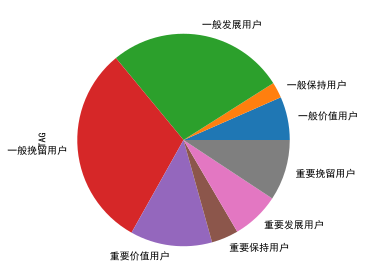

In [77]:
ser.plot(kind='pie')

逻辑斯蒂回归
锋云智慧 --> 注册
http://pt.1000phone.com/joinClassroom/1560/1676971232178

视频资源 python 课程  收看数据